# Goal: To predict price of a particular house using information like house area, number of bedrooms, number of bathrooms, and utilities

# Setup: Import necessary libraries, load datasets

## 1.1 import necessary libraries

In [183]:
# libraries for data
import pandas as pd
import numpy as np

# libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# libraries for statistical tests
from scipy import stats
from scipy.stats import norm

# for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

# ML models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# metrics to evaluate regression model
from sklearn.metrics import mean_squared_error

# for explainer
from lime import lime_tabular

import warnings
warnings.filterwarnings('ignore')

## 1.2 Load datasets

In [184]:
dtf=pd.read_csv('train.csv') # contains features and target variable (prices)

In [185]:
dtf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [186]:
col=train_df.columns
#col

In [187]:
dtf.shape

(1460, 81)

In [188]:
# Each house has unique Id value, so changing this to index
dtf=dtf.set_index('Id')
dtf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [189]:
dtf.shape

(1460, 80)

# 2. Data Processing

In [190]:
# want to dtype of features
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2.1 Missing values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64


<AxesSubplot:ylabel='Id'>

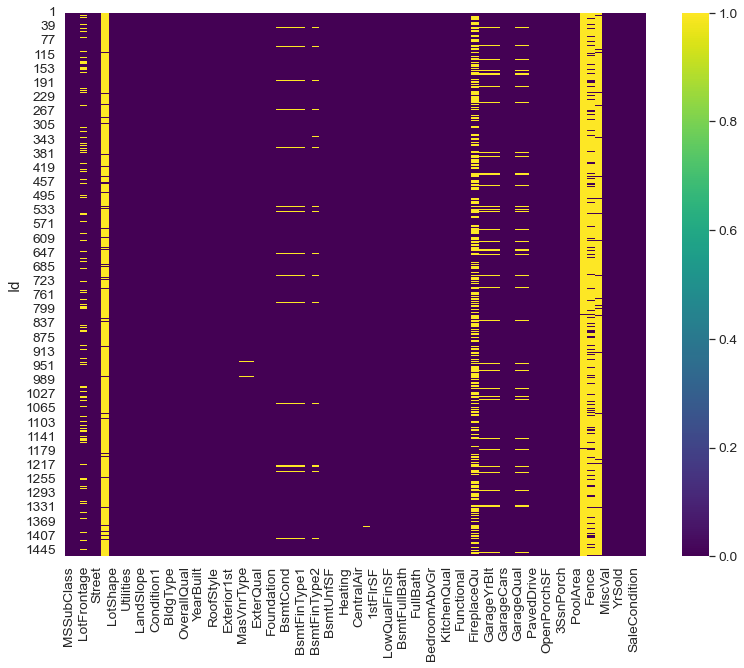

In [191]:
print(dtf.isnull().sum().sort_values(ascending=False)[:10]) # print sum of missing values

fig, ax = plt.subplots(figsize=(13,10))   
sns.heatmap(dtf.isnull(), cmap='viridis', ax=ax) # heatmap of missing values

# 2.2 EDA with visualization

Univariate: num: histogram, distplot or boxplot (preferable); cat: bar chart
bi-variate: both num (scatter plot, jointplot), both num but one fea with discrete values (boxplot), 1num, 1 cat (box plot)


## 2.2.1 Distribution of SalePrice (target var)

In [192]:
dtf.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

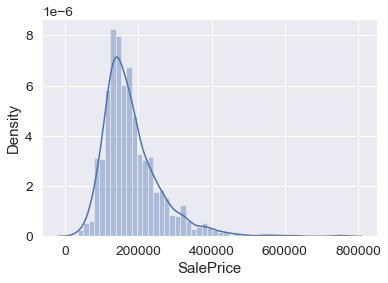

In [193]:
sns.distplot(dtf['SalePrice'], kde=True); # skewness observed with houses >400k

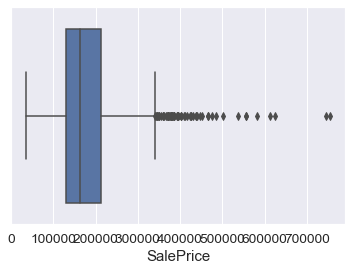

In [194]:
sns.boxplot(dtf.SalePrice) # box plot of SalePrice
plt.show() # median price is around ~180-190k, outliers observed >400k houses

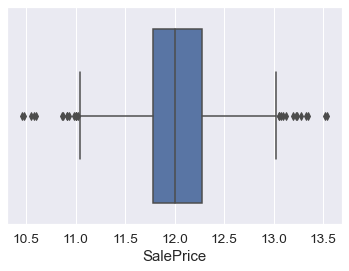

In [195]:
# np.log plots
sns.boxplot(np.log(dtf.SalePrice))
plt.show()   # outliers observed on both sides

# 2.3 Numeric columns

In [196]:
num_cols=dtf.select_dtypes(exclude='object')
num_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [197]:
# are any missing values in numeric columns?
print(num_cols.isnull().sum().sort_values(ascending=False).head(10))

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
dtype: int64


In [198]:
target=num_cols['SalePrice'] # slicing SalePrice column

In [199]:
# all numeric features except target variable
num_cols_features=num_cols.drop(['SalePrice'],axis=1)
num_cols_features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [200]:
print(num_cols_features.shape)

(1460, 36)


## 2.3.1 plotting relationship of numerical variables with target (SalePrice)

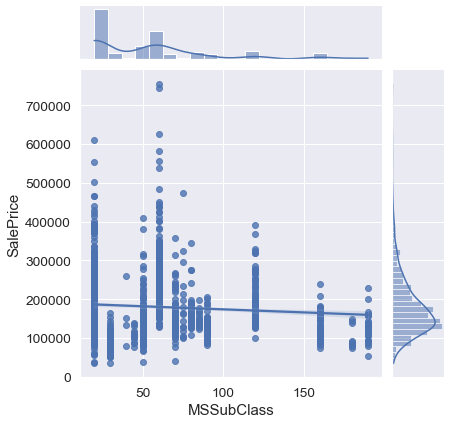

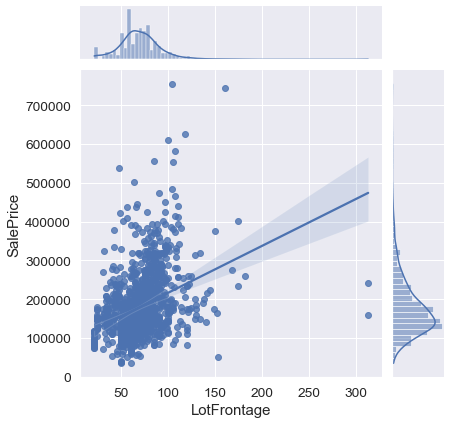

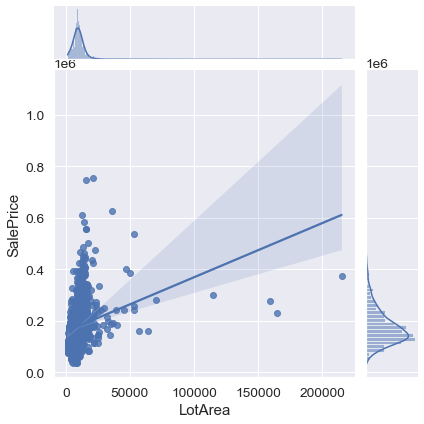

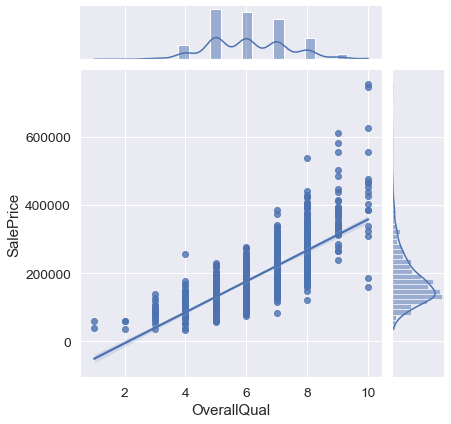

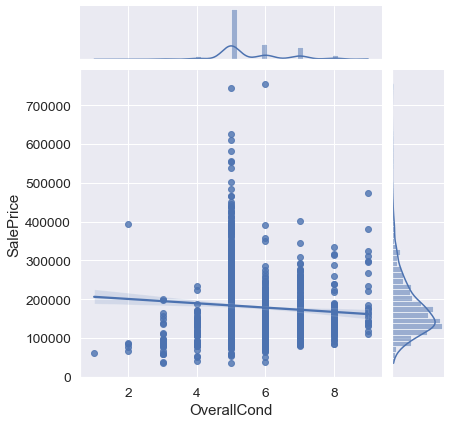

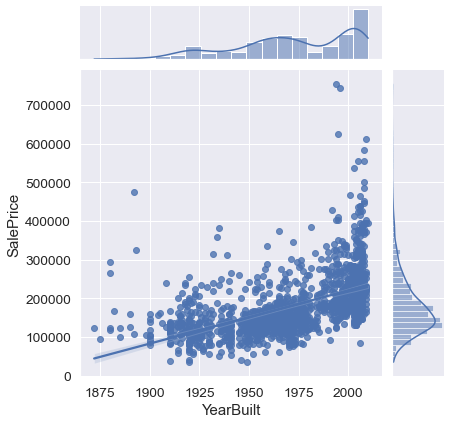

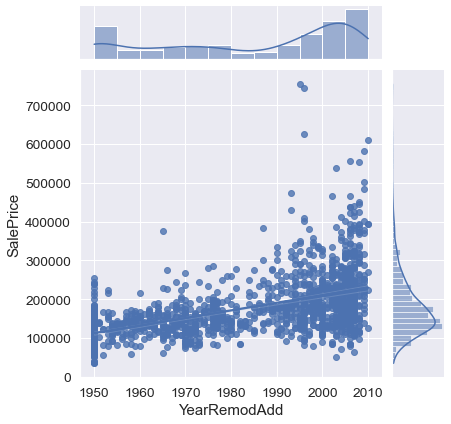

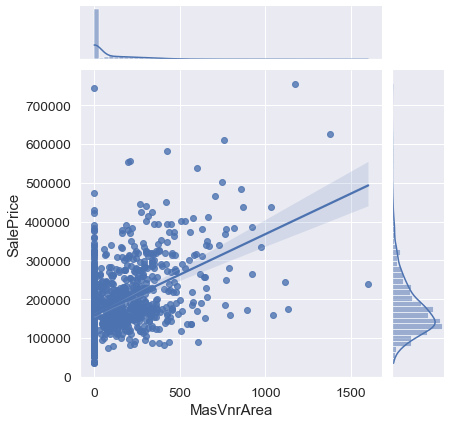

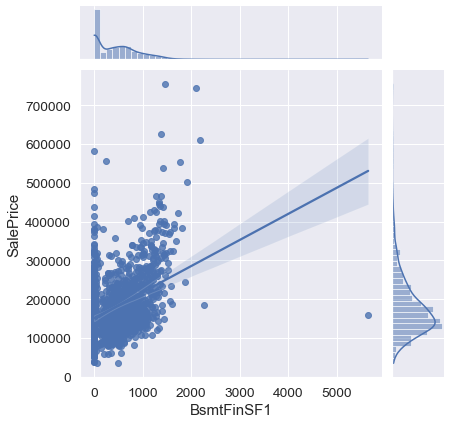

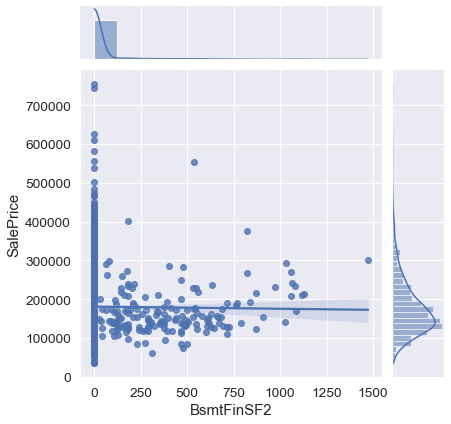

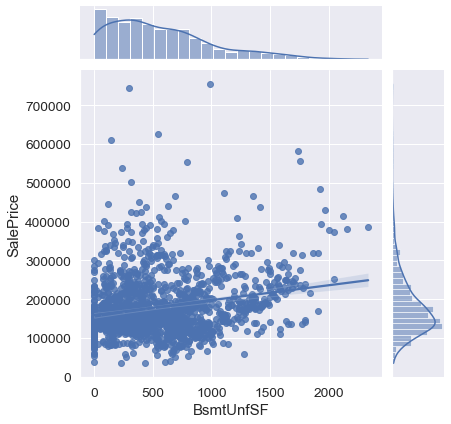

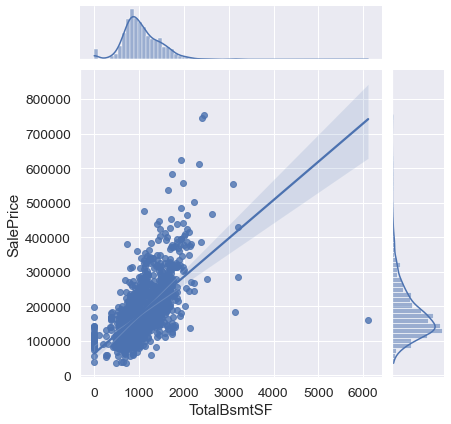

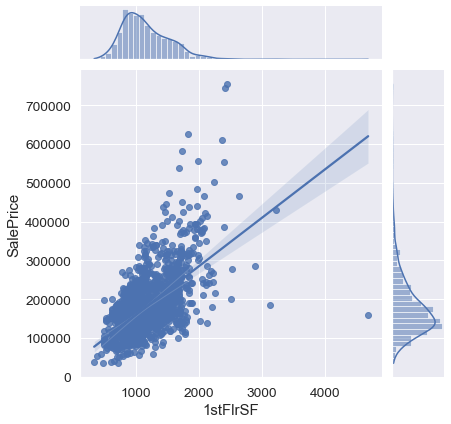

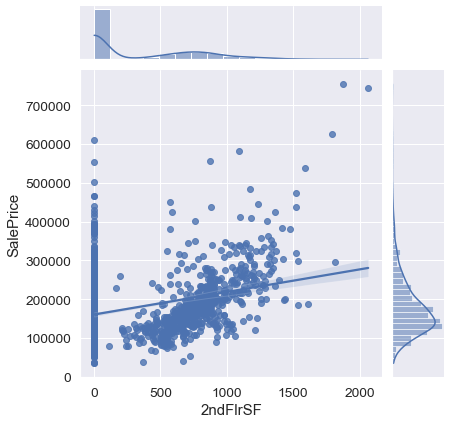

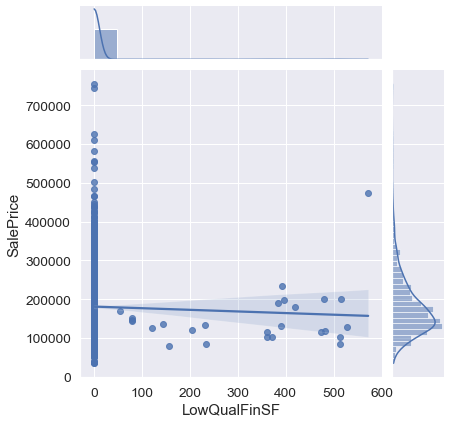

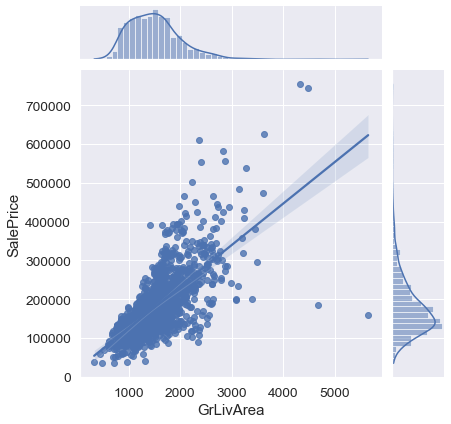

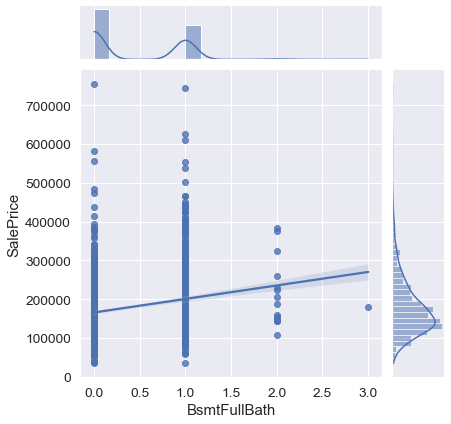

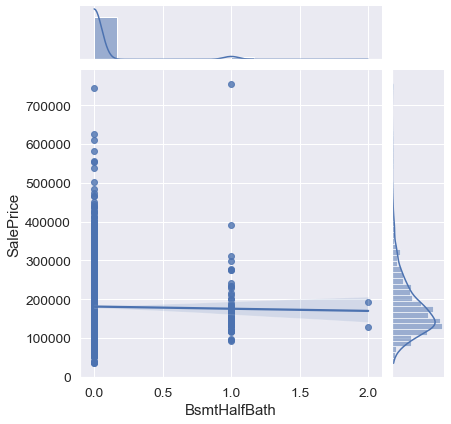

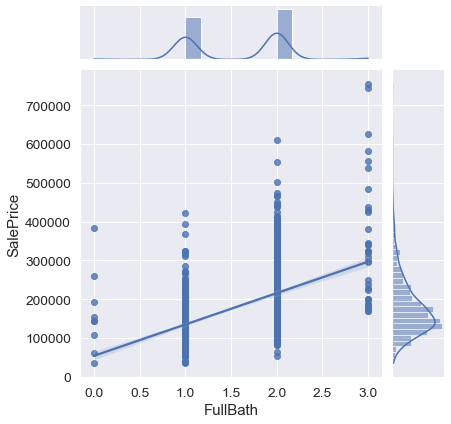

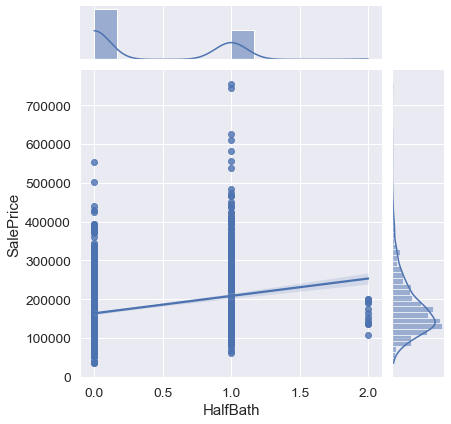

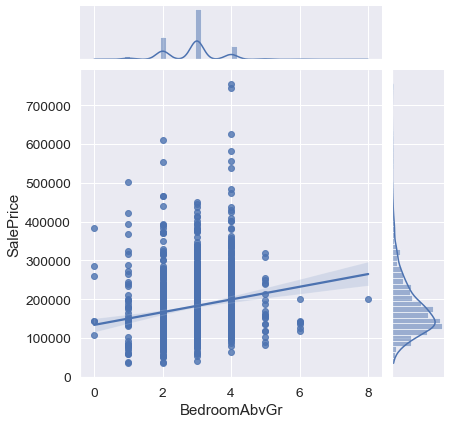

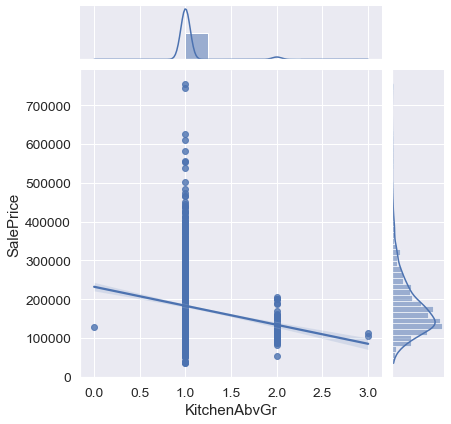

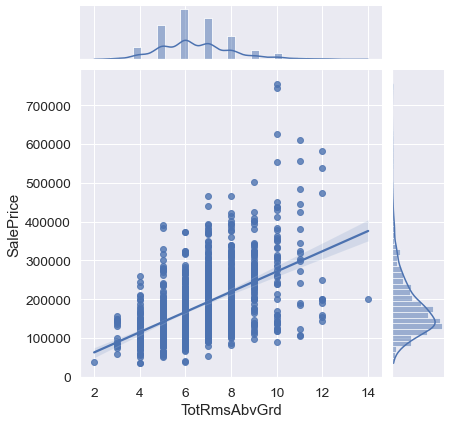

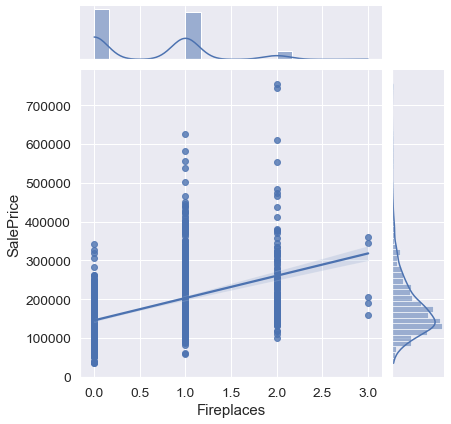

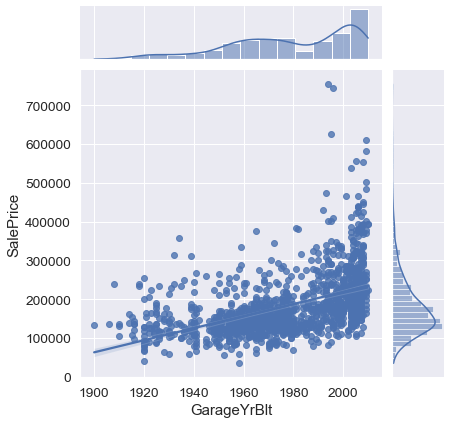

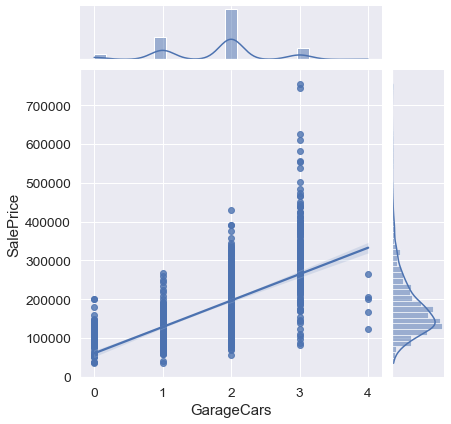

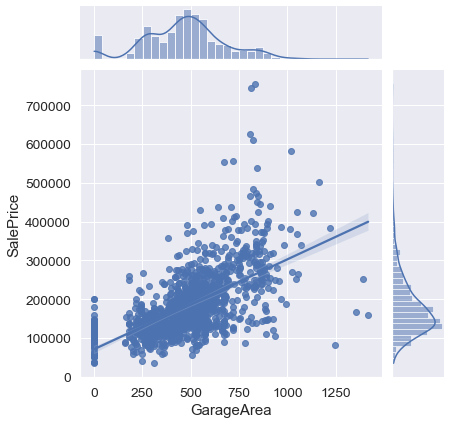

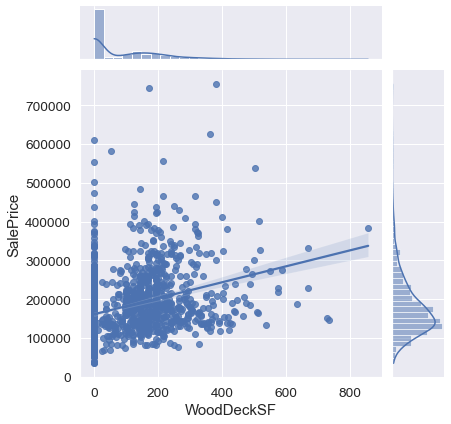

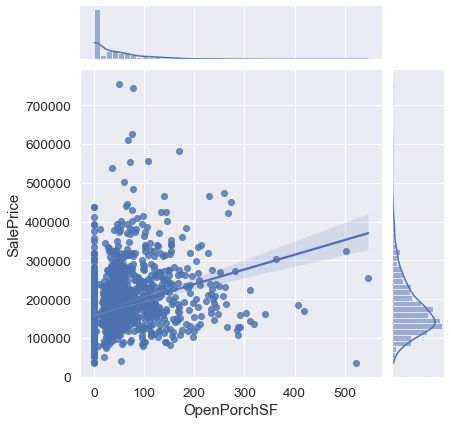

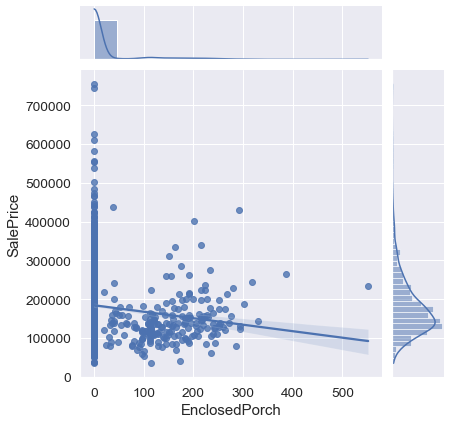

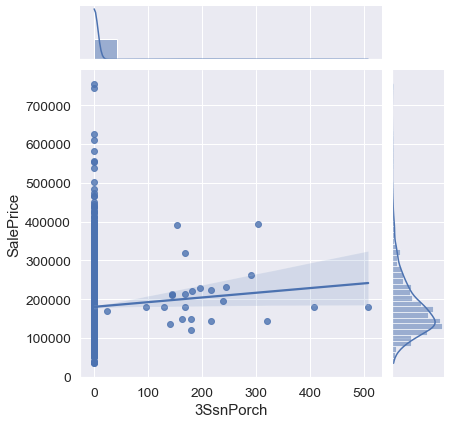

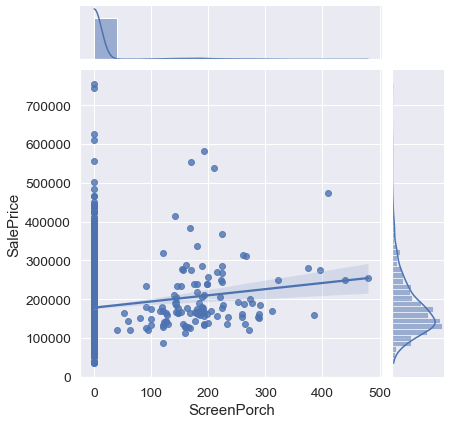

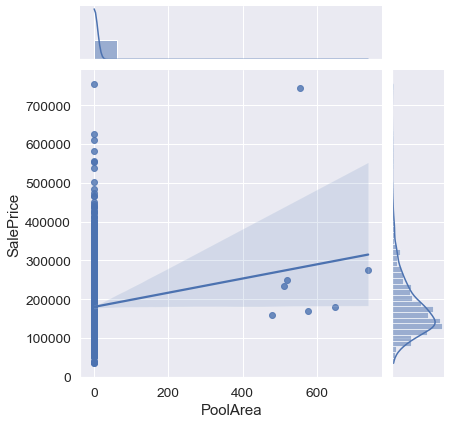

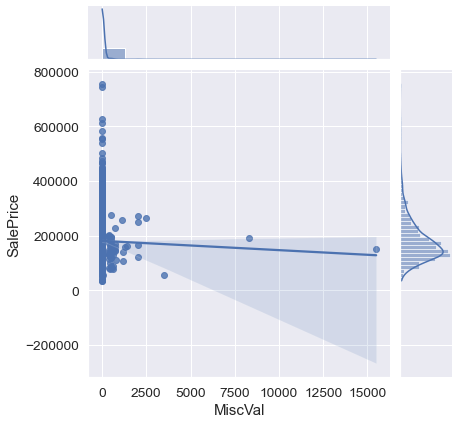

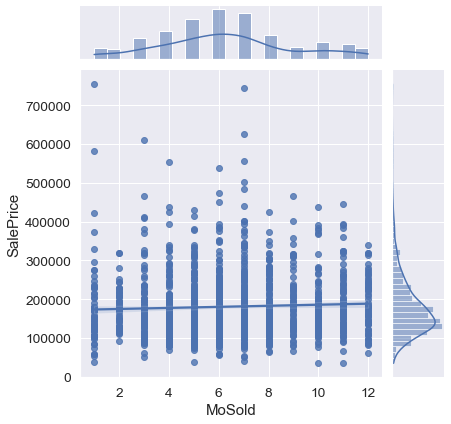

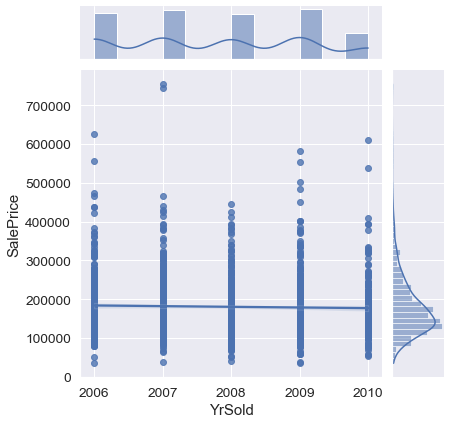

In [201]:
for i in num_cols_features:
    #sns.scatterplot(x=num_cols_features[i], y=target)
    sns.jointplot(x=num_cols_features[i], y=target, kind='reg')
    plt.show()    


### OverallQual, TotalBmsSF, BsmtFinSF1, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea related linearly with SalePrice, could be predictive features

outliers: LotFrontage>300; TotalBsmtSF >6000, 1stFlrSF>4000, GrLivArea>4500, GarageArea 0, >1200

17


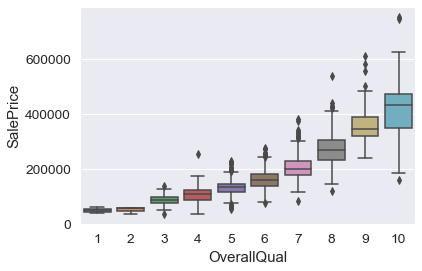

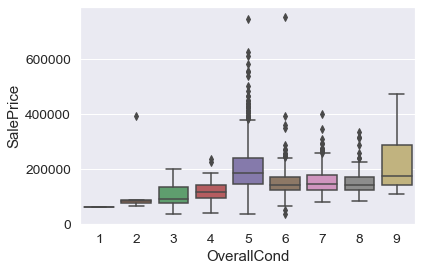

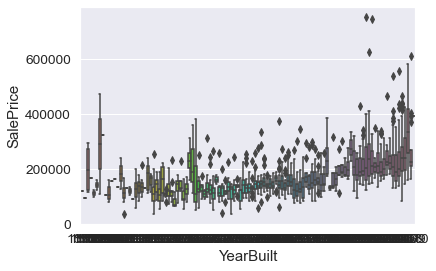

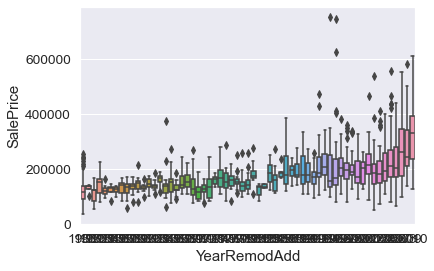

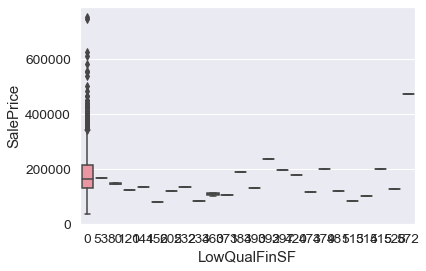

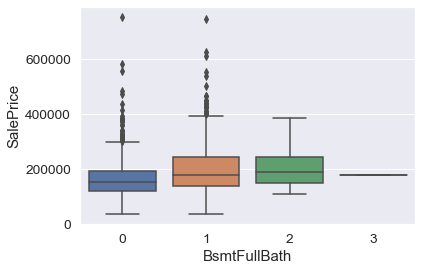

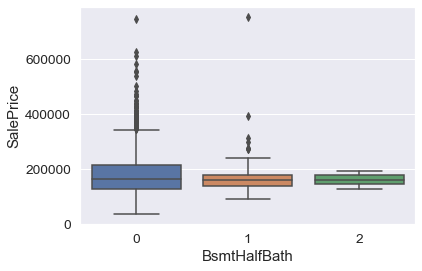

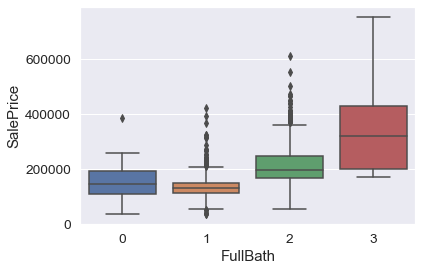

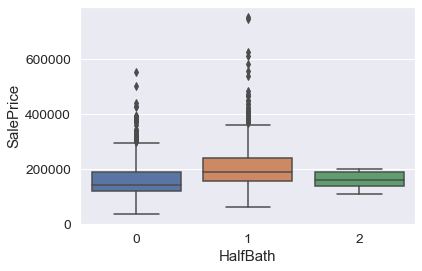

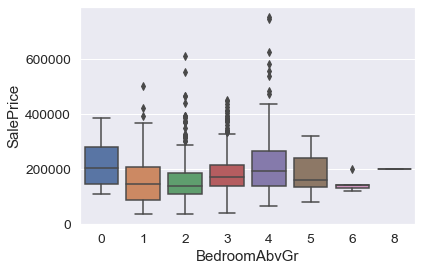

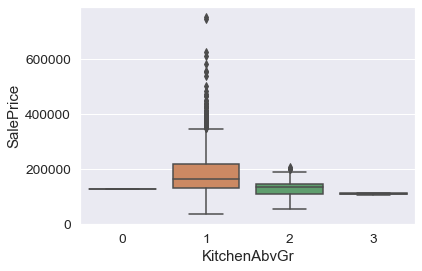

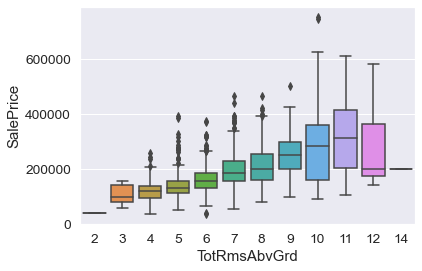

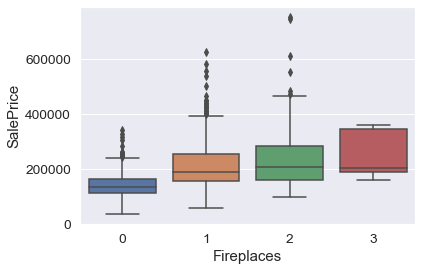

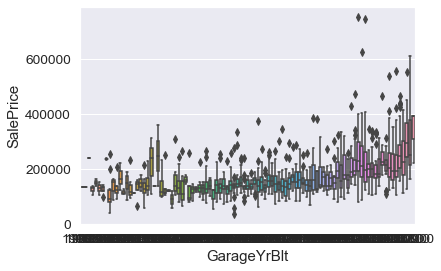

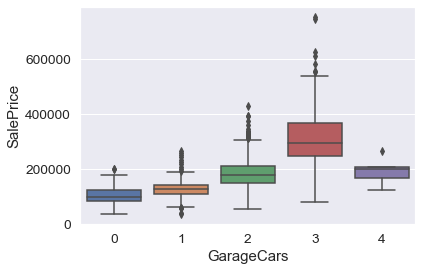

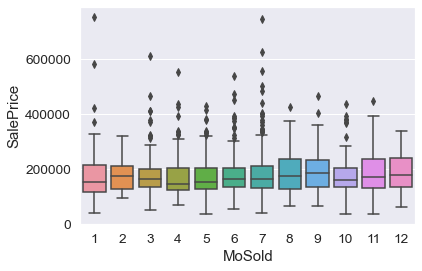

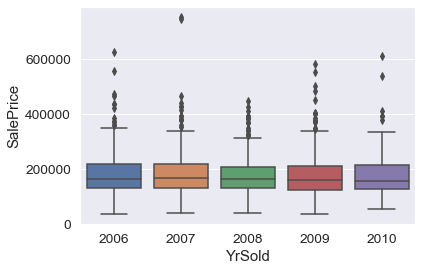

In [202]:
# plotting numeric columns with discrete values to SalePrice
cols=['OverallQual','OverallCond','YearBuilt','YearRemodAdd','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','MoSold','YrSold']
print(len(cols))
for i in cols:
    sns.boxplot(x=num_cols_features[i], y=target)
    plt.show()


#### Appears OverallQual, FullBath (is more baths, bigger house?), TptRmsAbvGrd, Fireplaces, GarageCars are predictive features for house price estimation

Pricing factors: 3 full bath's, 2 fireplaces, 3 garages, overall quality, recently built houses had higher prices.

# 2.3 Feature Engineering

## MSSubClass had more categories, reduce to few groups (min, max, medium)

    MSSubClass MSSubClass_cluster  SalePrice
Id                                          
1           60                max     208500
2           20               mean     181500
3           60                max     223500
4           70               mean     140000
5           60                max     250000


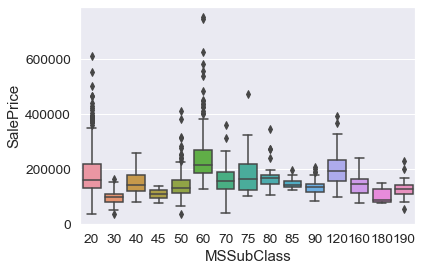

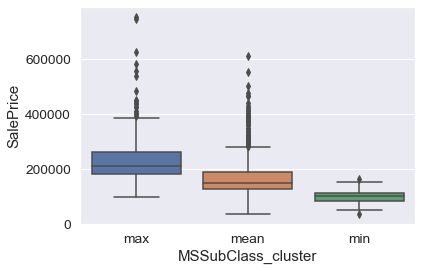

In [203]:
## define clusters
MSSubClass_clusters = {"min":[30,45,180], "max":[60,120], "mean":[]}
## create new columns
dic_flat = {v:k for k,lst in MSSubClass_clusters.items() for v in lst}
for k,v in MSSubClass_clusters.items():
    if len(v)==0:
        residual_class = k 
dtf['MSSubClass'+"_cluster"] = dtf['MSSubClass'].apply(lambda x: dic_flat[x] if x in 
                          dic_flat.keys() else residual_class)
## print
print(dtf[["MSSubClass","MSSubClass_cluster","SalePrice"]].head())


# plotting MSSubClass
sns.boxplot(x=dtf['MSSubClass'], y=target)
plt.show()

# plotting MSSubClass_cluster
sns.boxplot(x=dtf['MSSubClass_cluster'], y=target)
plt.show()

In [204]:
## drop MSSubClass
dtf=dtf.drop(columns=['MSSubClass'], axis=1)
dtf.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_cluster
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,max
2,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,mean
3,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,max
4,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,mean
5,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,max


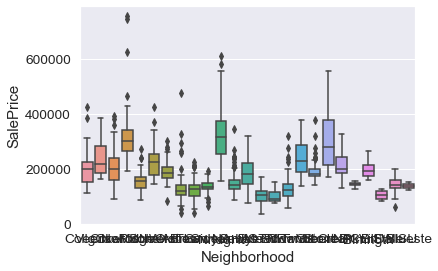

In [206]:
## Similarly, check if Neighborhood col can be grouped
ax=sns.boxplot(x=dtf['Neighborhood'], y=target)
#plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_xticklabels(xticklabels, rotation = 45)

# 2.2 Categorical Variables

In [207]:
cat_fea=dtf.select_dtypes(include='object')
cat_fea.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass_cluster'],
      dtype='object')

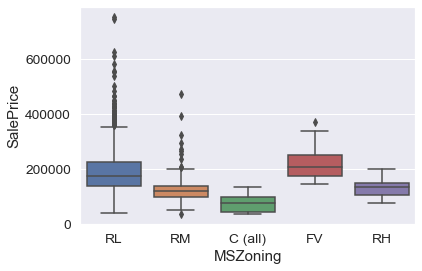

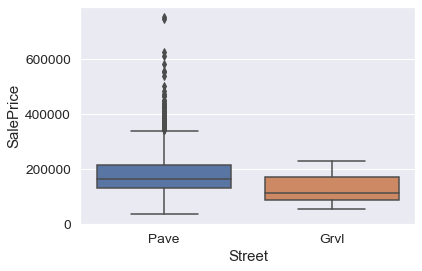

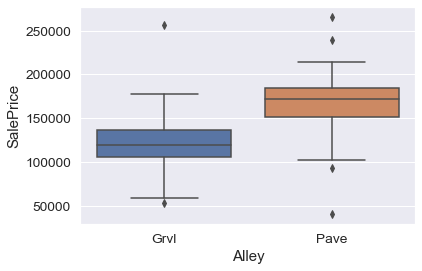

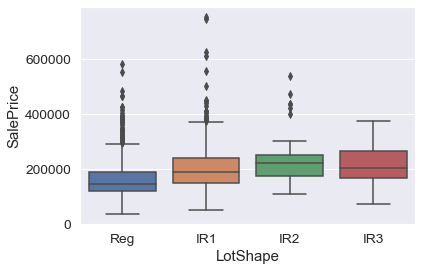

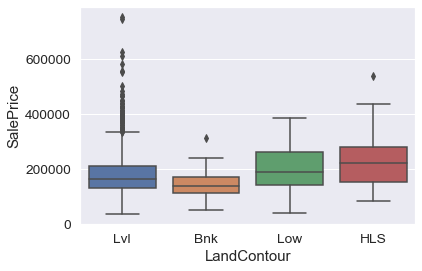

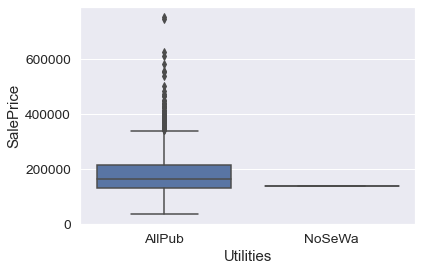

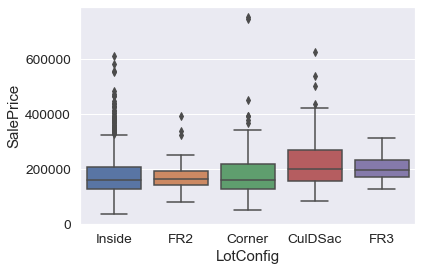

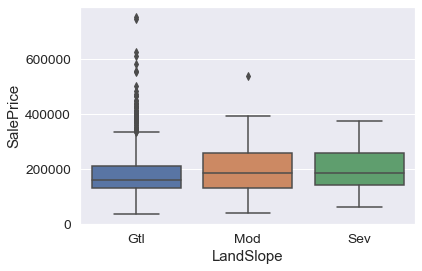

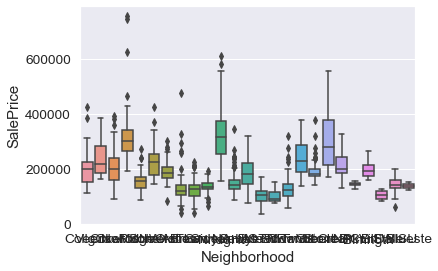

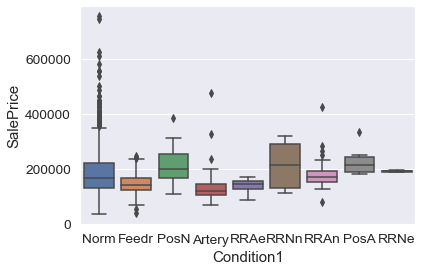

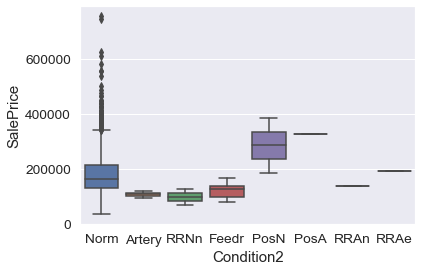

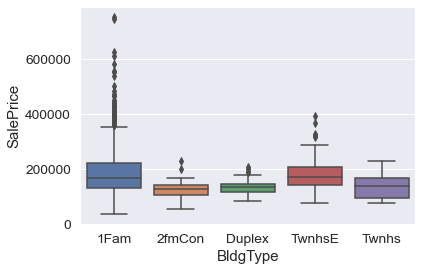

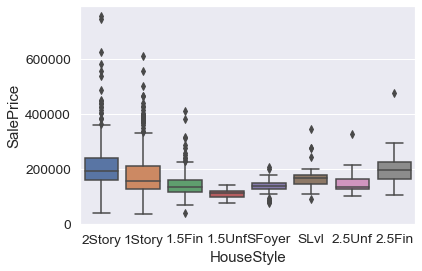

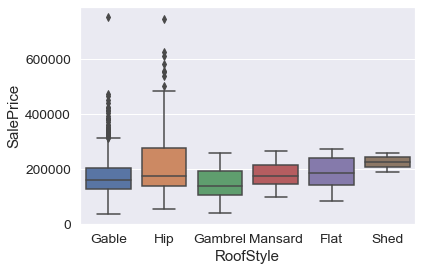

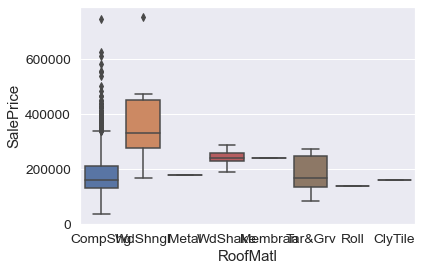

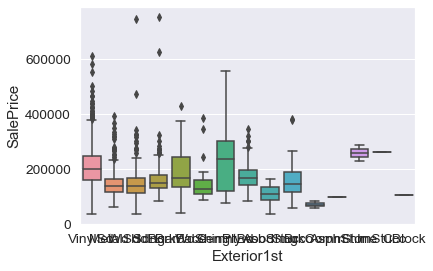

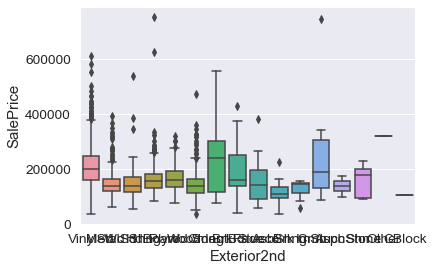

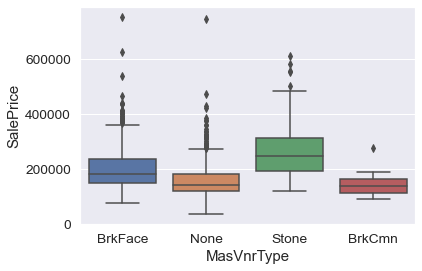

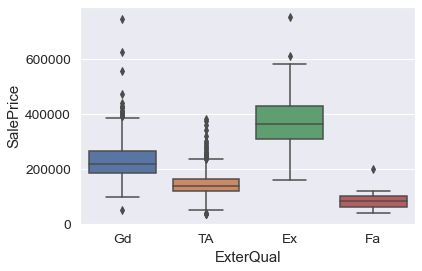

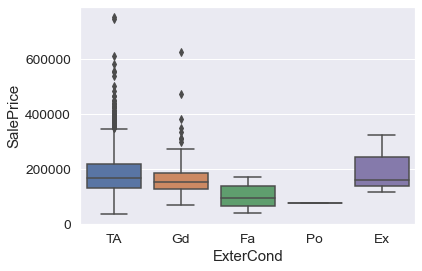

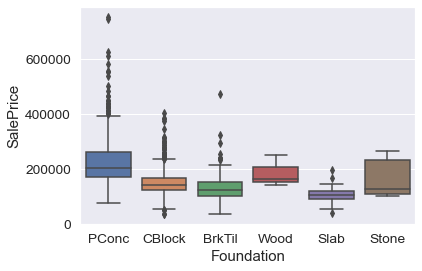

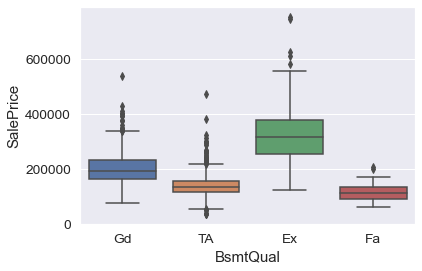

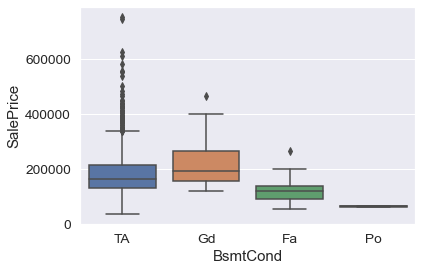

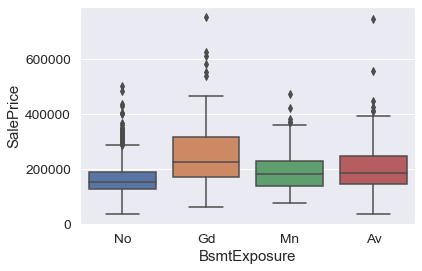

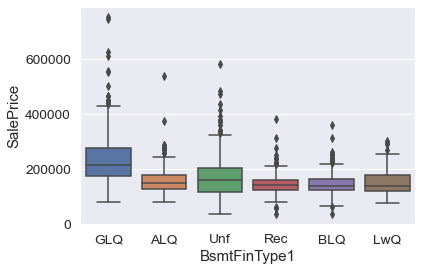

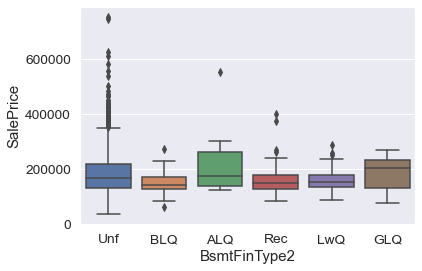

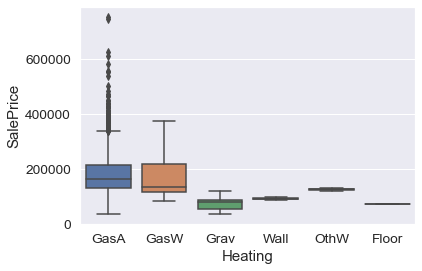

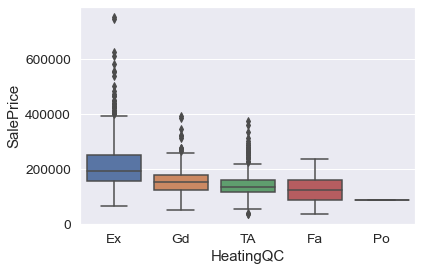

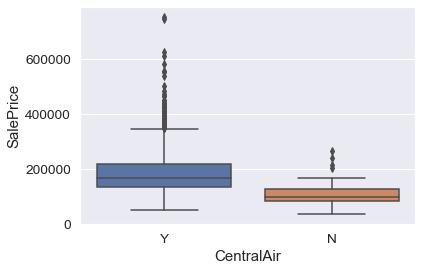

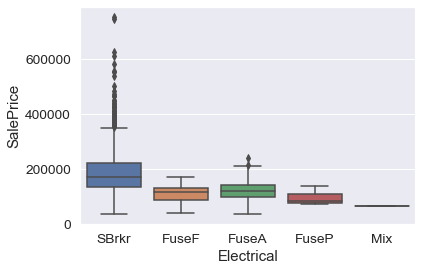

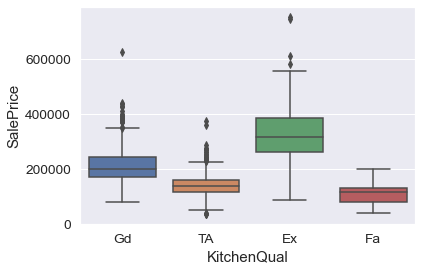

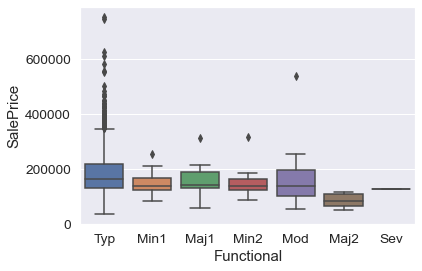

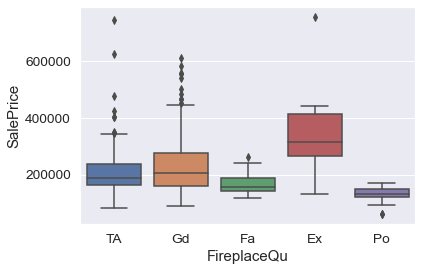

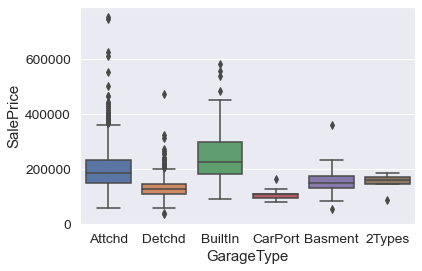

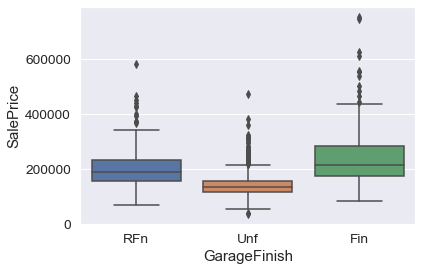

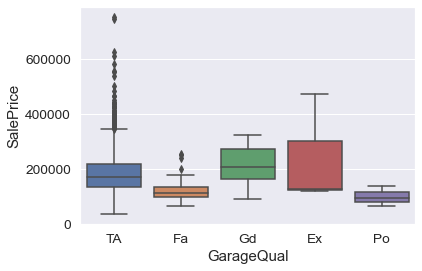

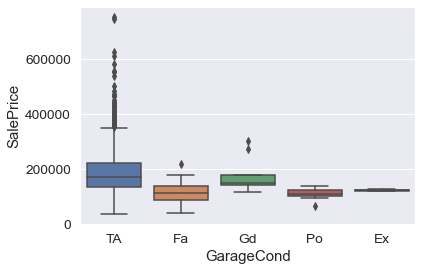

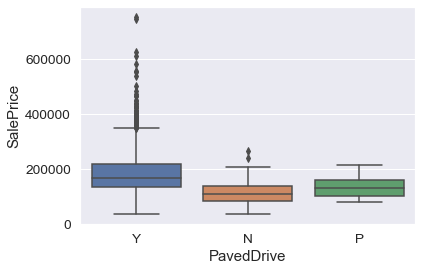

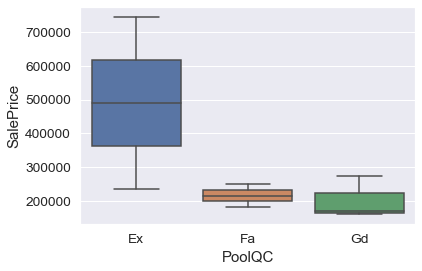

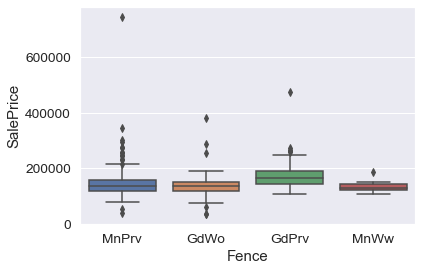

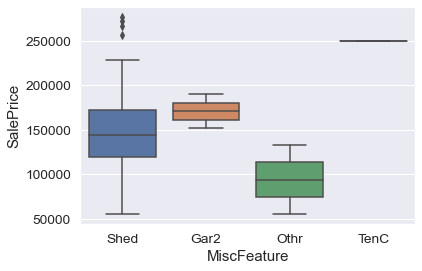

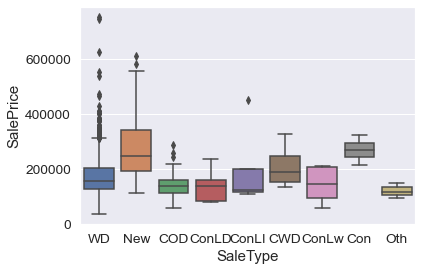

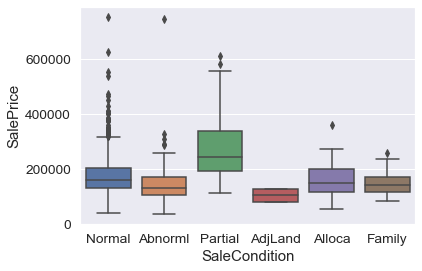

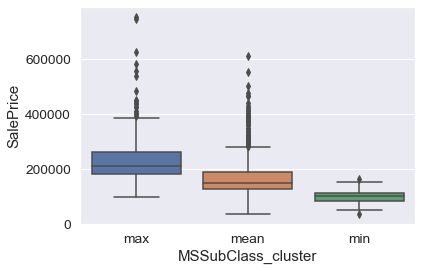

In [208]:
for j in cat_fea:
    sns.boxplot(x=cat_fea[j], y=target)
    plt.show()

In [209]:
dtf.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_cluster
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,max
2,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,mean
3,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,max
4,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,mean
5,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,max


<AxesSubplot:>

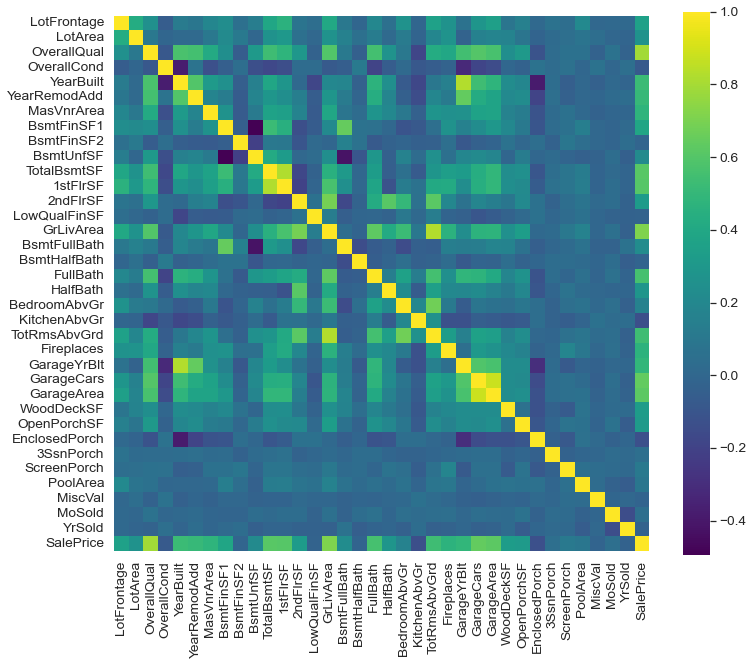

In [210]:
#Correlation matrix
corr_mat=dtf.corr()
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(corr_mat, cmap='viridis', square=True)

# 2.4 Plot top 10 correlated features with values

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


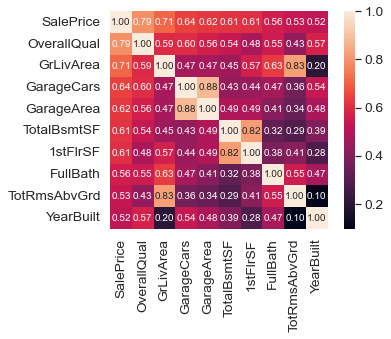

In [211]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(dtf[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Summary: OverallQual, GrLivArea are more correlated with SalePrice. GarageCars and GarageArea seems to be colinear features, will have same info means # of cars fit in Garage depends on Garage Size. So, keep only GarageCars column. Similary, TotalBsmtSF and 1stFlrSF are coliniear, keep TotalBsmtSF column. FullBath, TotRmsAbvGrd, Year Built seem correlated with Sale price 

# 2.4 Handling missing data

### How frequent is the missing data and it it random or any pattern exist 

In [212]:
miss_sum=dtf.isnull().sum()
perc_miss=(dtf.isnull().sum()/dtf.isnull().count())*100
missing=pd.concat([miss_sum,perc_miss], axis=1, keys=['Sum_of_missing', 'Percent_missing'])
data=missing.reset_index().sort_values(['Percent_missing'], ascending=False)
data.head(20)

,index,Sum_of_missing,Percent_missing
70,PoolQC,1453,99.520548
72,MiscFeature,1406,96.301370
4,Alley,1369,93.767123
71,Fence,1179,80.753425
55,FireplaceQu,690,47.260274
1,LotFrontage,259,17.739726
62,GarageCond,81,5.547945
56,GarageType,81,5.547945
61,GarageQual,81,5.547945
57,GarageYrBlt,81,5.547945


#### Consider removing features with >=37 missing values. Also, these are not important features determining house prices. All the garage features except GarageCars had >5% missing data, since GarageCars had less missing data and useful info, I am keeping this column and remove rest of the Garage features. Similarly, keep BsmtSF and remove (BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1 features). MasVnrArea and MasVnrType are not important features, so dropping them doesn't hurt. Finally, some feature had just 1 missing value, so I am dropping those rows.

### 2.4 Summary of handling missing data: Dropping all features (18) with >8 missing values

In [213]:
print(list(data['index'][:18])) # slice features with high missing data

# list of columns with high missing data except SalePrice
cols_drop=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType']
data_set=dtf.drop(dtf[cols_drop], axis=1)
data_set.head()

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageCond', 'GarageType', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea']


,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_cluster
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,2,2008,WD,Normal,208500,max
2,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,5,2007,WD,Normal,181500,mean
3,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,9,2008,WD,Normal,223500,max
4,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,0,0,0,2,2006,WD,Abnorml,140000,mean
5,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,12,2008,WD,Normal,250000,max


In [214]:
print(dtf.shape)
print(data_set.shape)

(1460, 80)
(1460, 62)


In [215]:
# drop rows with missing values (since some features had 1-4 missing values)
data_set=data_set.dropna()
# Making sure no missing data exist
data_set['SalePrice'].isnull().sum()

0

In [216]:
data_set.isnull().sum().sort_values(ascending=False).head()

MSZoning        0
GarageCars      0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
dtype: int64

<AxesSubplot:>

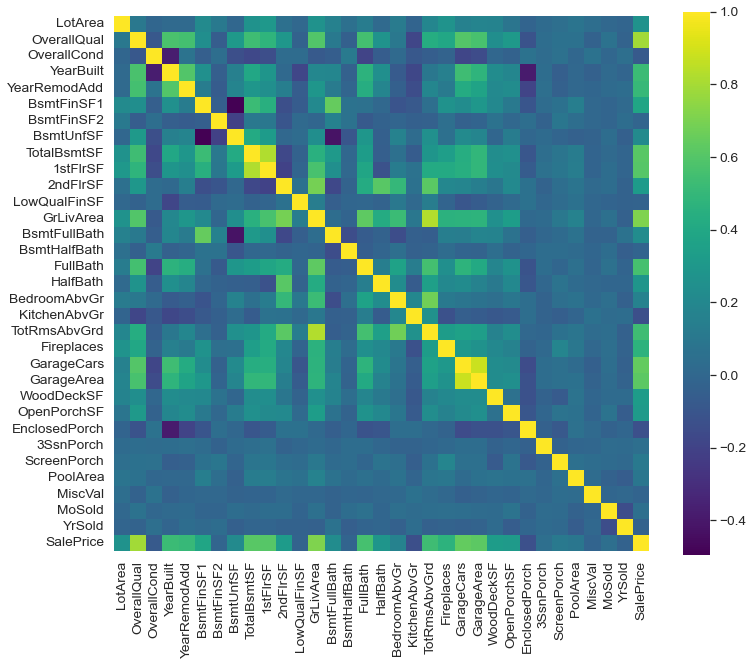

In [217]:
corr_mat1=data_set.corr()
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(corr_mat1, cmap='viridis', square=True)

# 2.5 Handling Outliers

## 2.5.1 Univariate plot

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

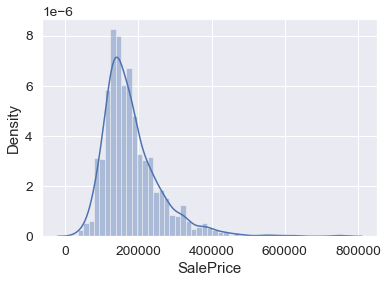

In [219]:
sns.distplot(data_set.SalePrice)

## 2.5.2 Bivariate plots with key features 

### 2.5.2.1 Detect and drop Outliers from key features

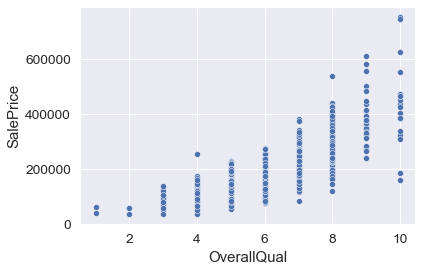

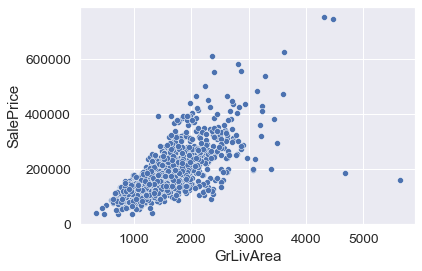

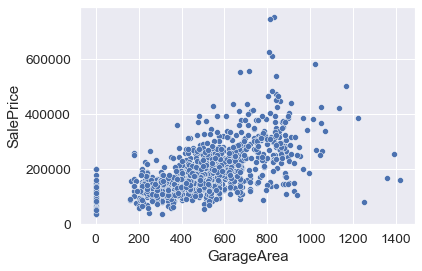

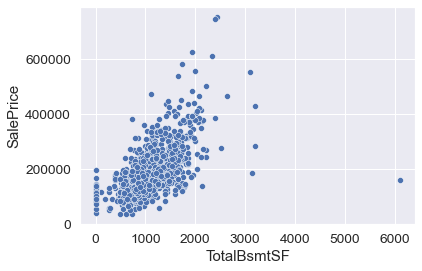

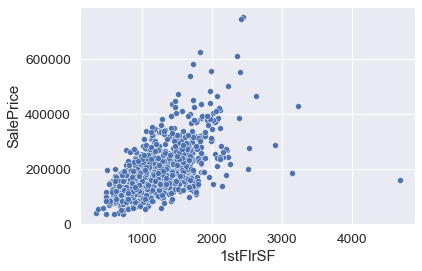

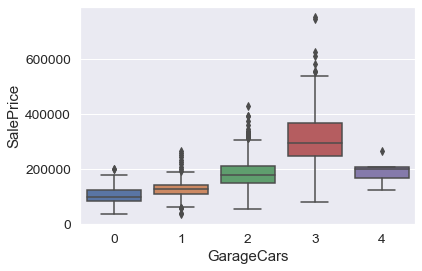

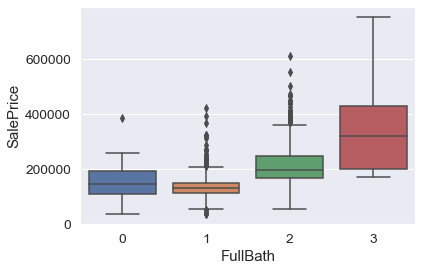

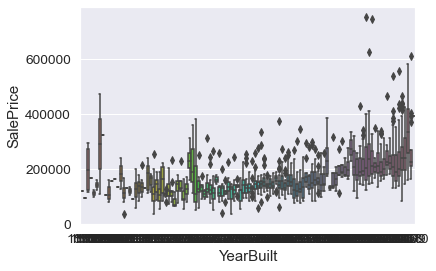

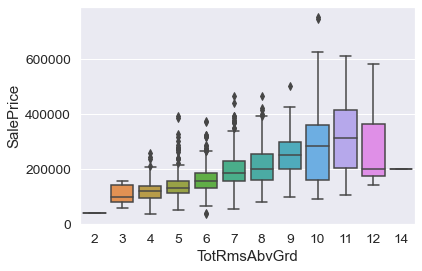

In [223]:
key_features=['OverallQual', 'GrLivArea',  'GarageArea',
       'TotalBsmtSF', '1stFlrSF']
cat_feas=['GarageCars','FullBath','YearBuilt', 'TotRmsAbvGrd']
for i in key_features:
    sns.scatterplot(x=data_set[i], y=data_set['SalePrice'])
    plt.show()
    
for j in cat_feas:
    sns.boxplot(x=data_set[j], y=target)
    plt.show()

#### Outliers are detected with GrLivArea >4500 (but two obs's on top of plot seems to follow linear trend). TotalBsmtSF>6000; TotRmsAbvGrd>12

In [224]:
# drop rows with GrLivArea >4000 but SalePrice <185000 to keep top outliers
df1 = data_set.drop(data_set
                   [(data_set['GrLivArea']>4000) & (data_set['SalePrice']<185000)].index)

df1.shape

(1457, 62)

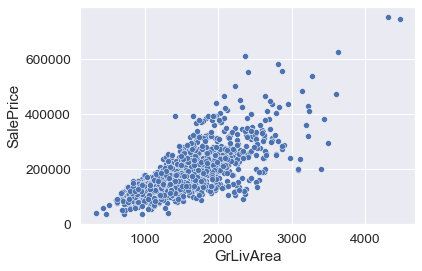

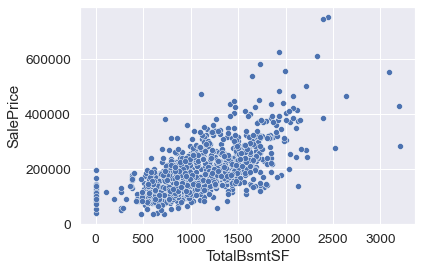

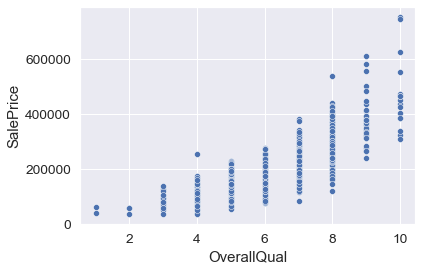

In [226]:
## making sure if outliers are removed from key features

key_features=['GrLivArea','TotalBsmtSF','OverallQual']
for i in key_features:
    sns.scatterplot(x=df1[i], y=df1['SalePrice'])
    plt.show()

#### Yes, removed the outliers with GrLivArea >4500; TotalBsmtSF>3000 may not be outliers, so not removing them

In [265]:
df1.isnull().sum()

MSZoning              0
LotArea               0
Street                0
LotShape              0
LandContour           0
                     ..
YrSold                0
SaleType              0
SaleCondition         0
SalePrice             0
MSSubClass_cluster    0
Length: 62, dtype: int64

In [266]:
df1.columns

Index(['MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'MSSubClass_cluster'],
      dtype='object')

# Split data

In [267]:
dtf_train, dtf_test=train_test_split(dtf, test_size=0.3, random_state=0)
print(dtf_train.shape)
print(dtf_test.shape)

(1022, 80)
(438, 80)


In [268]:
# preprocessing (Encoding categorical variables) to dtf_train only

## create dummy
dummy = pd.get_dummies(dtf_train["MSSubClass_cluster"], 
                       prefix="MSSubClass_cluster",drop_first=True)
dtf_train= pd.concat([dtf_train, dummy], axis=1)
#dtf_train.head()

print(dtf_train.filter(like="MSSubClass_cluster",axis=1).head() )
## drop the original categorical column
dtf_train = dtf_train.drop("MSSubClass_cluster", axis=1)


     MSSubClass_cluster  MSSubClass_cluster_mean  MSSubClass_cluster_min
Id                                                                      
65                  max                        0                       0
683                 max                        0                       0
961                mean                        1                       0
1385               mean                        1                       0
1101                min                        0                       1


In [269]:
dtf_train.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_cluster_mean,MSSubClass_cluster_min
Id,,,,,,,,,,,,,,,,,,,,,
65,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,GdPrv,NaN,0,2,2009,WD,Normal,219500,0,0
683,RL,NaN,2887,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,...,NaN,NaN,0,11,2008,WD,Normal,173000,0,0
961,RL,50.0,7207,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,0,2,2010,WD,Normal,116500,1,0
1385,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,MnPrv,NaN,0,10,2009,WD,Normal,105000,1,0
1101,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,...,NaN,NaN,0,1,2009,WD,Normal,60000,0,1


### scale the features with RobustScaler (transforms the feature by subtracting the median and then dividing by the interquartile range (75% value — 25% value). The advantage of this scaler is that it’s less affected by outliers).

In [273]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))

#X=dtf_train.drop("SalePrice", axis=1)
X = scalerX.fit_transform(dtf_train.drop("SalePrice", axis=1))
#dtf_scaled= pd.DataFrame(X, columns=X.columns, index=dtf_train.index)
#dtf_scaled.head()



ValueError: could not convert string to float: 'RL'

# Feature Scaling

In [384]:
scaling=MinMaxScaler(feature_range=(0,1))
X=scaling.fit_transform(X) # Fit and transform MinMaxScaler to features (X)


# Train, Test, split data

## 4.2 Multiple Linear Regression model

y= a1x1 + a2x2 + a3x3+....+b (linear reg minimizes a loss function (OLS) while choosing coefficients for fitting the model in sklearn. 

In [386]:
# instantiate linearregression
lr=LinearRegression()
# fit leniar regression on training data
lr.fit(X_train, y_train)
# predict on training data
y_trpred=lr.predict(X_train)
# predict on test data
y_pred=lr.predict(X_test)

print('R^2: {}'.format(lr.score(X_test, y_test)))
      
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error: {}".format(rmse))

R^2: -2.589218051133751e+16
Root Mean Square Error: 63343259.608817324


In [387]:
y_pred[:10]

array([11.82890368, 11.95838594, 11.46530342, 11.81208038, 12.61788702,
       11.92483091, 12.08109188, 11.75022984, 11.88111591, 12.19779015])

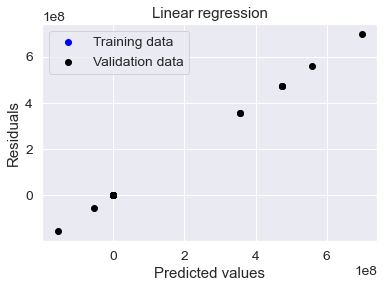

In [388]:
#plot between predicted values and residuals
plt.scatter(y_trpred, y_trpred - y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_pred - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

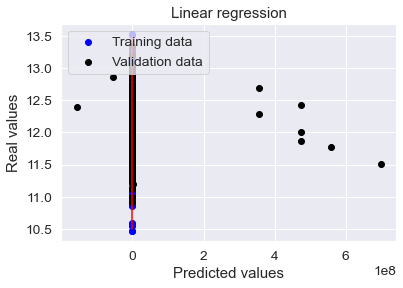

In [389]:
# Plot predictions - Real values
plt.scatter(y_trpred, y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# 4.2.1 Five fold cross validation

Cross-validation is a vital step in evaluating a model.

In [390]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
# compute 5-fold cross-val scores
cv_scores=cross_val_score(lr, X, y, cv=5)

print("5-fold cross val scores (i.e R^2 values):{}". format(cv_scores))
print('Mean cross val score or mean R^2 value: {}'.format(np.mean(cv_scores)))

5-fold cross val scores (i.e R^2 values):[-3.02704027e+19 -3.10960506e+20 -3.22708664e+16 -1.20182327e+19
 -1.15075310e+21]
Mean cross val score or mean R^2 value: -3.00806902177724e+20


### Large coefficients can lead to overfitting of Linear Regression; So, Regularization can penalize overfitting by handling colinearity. 

# 4.3. Ridge Regression
Parameter is alpha like k in KNN (alpha=0 leads to overfitting, very high alpha leads to underfitting) 

In [391]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print('Best alpha',alpha)

# predict on training data
y_trpred=ridge.predict(X_train)
# predict on test data
y_pred=ridge.predict(X_test)
print('R^2 value:{}'.format(ridge.score(X_test, y_test)))
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error: {}".format(rmse))

Best alpha 1.0
R^2 value:0.9266090722008506
Root Mean Square Error: 0.10664421066572098


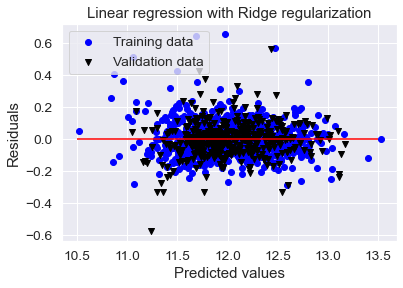

In [392]:
# Plot residuals
plt.scatter(y_trpred, y_trpred - y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_pred - y_test, c = "black", marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

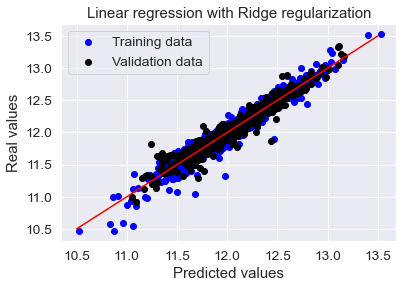

In [393]:
# Plot predictions - Real values
plt.scatter(y_trpred, y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# 4.4. Lasso Regression


In [394]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
print('R^2 value:{}'.format(lasso.score(X_test, y_test)))

R^2 value:-0.00011015472492204026


# Predictions

In [395]:
test_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0


In [396]:
test_array[:10]

array([[0.00000000e+00, 0.00000000e+00, 2.01013781e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.85871056e-04, 0.00000000e+00, 2.53385870e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.37174211e-03, 2.35294118e-01, 2.44733090e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.80109739e-03, 2.35294118e-01, 1.37256455e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.48696845e-03, 0.00000000e+00, 1.72382386e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.17283951e-03, 0.00000000e+00, 1.37216854e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [398]:
#predictied values
lr=LinearRegression()
# fit leniar regression on training data
lr.fit(X_train, y_train)
new_pred=lr.predict(test_array)
new_pred

ValueError: X has 205 features, but LinearRegression is expecting 220 features as input.

In [569]:
# predicted values dataframe
predicted_data=pd.DataFrame({'Id':test_data['Id'],
                            'SalePrice_Predicted':new_pred})
predicted_data.head()

,Id,SalePrice_Predicted
4,1465,10.453630
5,1466,10.459122
6,1467,10.456923
7,1468,10.458368
8,1469,10.462245


In [570]:
pred_df=pd.concat([predicted_data, True_values], axis=1)
pred_df.head()

,Id,SalePrice_Predicted,SalePrice
4,1465,10.453630,11.923246
5,1466,10.459122,12.084758
6,1467,10.456923,12.055660
7,1468,10.458368,12.073175
8,1469,10.462245,11.995424


In [572]:
pd.DataFrame({'True Values': True_values, 'Predicted Values': new_pred}).hvplot.scatter(x='True Values', y='Predicted Values')


AttributeError: 'DataFrame' object has no attribute 'hvplot'